In [1]:
import pandas as pd
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import psycopg2
import csv
import pandas as pd
import json
from area import area
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet  

from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 

from math import sin, cos, sqrt, atan2, radians




C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
crimes = pd.read_csv('C:\\Users\\zinkk\\Documents\\MSDS Classes\\498\\Chicago_Crime_Data_04192021\\Crimes_2021_to_2016.csv')

crimes.head()

C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11645836.0,JC212333,5/1/2016 0:25,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016.0,4/6/2019 16:04,NaN,NaN,NaN
1,11043021.0,JA367631,10/19/2016 19:00,075XX S YATES BLVD,610,BURGLARY,FORCIBLE ENTRY,RESTAURANT,False,False,...,7.0,43.0,5,NaN,NaN,2016.0,8/5/2017 15:50,NaN,NaN,NaN
2,11243066.0,JB168427,3/29/2016 7:00,067XX S RIDGELAND AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,5.0,43.0,11,NaN,NaN,2016.0,3/1/2018 15:54,NaN,NaN,NaN
3,11243020.0,HZ184094,3/11/2016 23:00,052XX N ST LOUIS AVE,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE PORCH/HALLWAY,False,False,...,39.0,13.0,2,NaN,NaN,2016.0,3/1/2018 15:54,NaN,NaN,NaN
4,11227940.0,JB148122,1/1/2016 11:00,108XX S CALUMET AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,9.0,49.0,11,NaN,NaN,2016.0,2/12/2018 15:49,NaN,NaN,NaN


In [3]:
crimes.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1477718,11577771.0,JC130359,10/5/2018 10:00,054XX W LE MOYNE ST,1195,DECEPTIVE PRACTICE,FINANCIAL EXPLOITATION OF AN ELDERLY OR DISABL...,RESIDENCE,False,False,...,37.0,25.0,11,NaN,NaN,2018.0,4/16/2021 17:19,NaN,NaN,NaN
1477719,12341117.0,JE197654,6/14/2018 14:00,097XX S UNION AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,VEHICLE - COMMERCIAL,False,False,...,34.0,73.0,2,NaN,NaN,2018.0,4/16/2021 17:26,NaN,NaN,NaN
1477720,12341508.0,JE200961,8/29/2018 0:00,002XX E 59TH ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,...,20.0,40.0,11,NaN,NaN,2018.0,4/16/2021 17:26,NaN,NaN,NaN
1477721,11248802.0,JB176088,3/6/2018 17:35,131XX S LANGLEY AVE,530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,CHA APARTMENT,False,True,...,9.0,54.0,04A,1183247.0,1818217.0,2018.0,4/17/2021 17:23,41.656378,-87.60513,"(41.656377699, -87.605129591)"
1477722,11452458.0,JB443662,9/20/2018 15:37,040XX N KENMORE AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,46.0,3.0,04A,1168447.0,1926946.0,2018.0,4/17/2021 17:23,41.955072,-87.65615,"(41.955072407, -87.656149793)"


In [4]:
# #visualizing and observing the null elements in the dataset
# plt.figure(figsize=(10,10))
# sns.heatmap(crimes.isnull(), cbar = False, cmap = 'YlGn')   #ploting missing data #cbar, cmap = colour bar, colour map

In [5]:
# #assembling a datetime by rearranging the dataframe column "Date" converting it to date-time format
# crimes.Date = pd.to_datetime(crimes.Date, format='%m/%d/%Y %I:%M:%S %p')  #I-Hour %p-AM/PM

In [6]:
crimes.Date 

0             5/1/2016 0:25
1          10/19/2016 19:00
2            3/29/2016 7:00
3           3/11/2016 23:00
4            1/1/2016 11:00
                 ...       
1477718     10/5/2018 10:00
1477719     6/14/2018 14:00
1477720      8/29/2018 0:00
1477721      3/6/2018 17:35
1477722     9/20/2018 15:37
Name: Date, Length: 1477723, dtype: object

In [7]:
# setting the index to be the date-time column 
crimes.index = pd.DatetimeIndex(crimes.Date)


In [8]:
# #counting all the no of elements within a specific column 'Primary Type'
# crimes['Ward'].value_counts()

In [9]:
# #top 15 cases
# crimes['Ward'].value_counts().iloc[:15]

In [10]:
#counting all the no of elements within a specific column 'Primary Type'
crimes['Primary Type'].value_counts()

THEFT                                330905
BATTERY                              279527
CRIMINAL DAMAGE                      163876
ASSAULT                              115349
DECEPTIVE PRACTICE                   113113
OTHER OFFENSE                         92921
NARCOTICS                             66559
BURGLARY                              65344
MOTOR VEHICLE THEFT                   61776
ROBBERY                               57057
WEAPONS VIOLATION                     37402
CRIMINAL TRESPASS                     34434
OFFENSE INVOLVING CHILDREN            12999
PUBLIC PEACE VIOLATION                 8371
SEX OFFENSE                            6311
INTERFERENCE WITH PUBLIC OFFICER       5948
CRIM SEXUAL ASSAULT                    5515
HOMICIDE                               4154
PROSTITUTION                           3416
CRIMINAL SEXUAL ASSAULT                3296
ARSON                                  2915
STALKING                               1217
LIQUOR LAW VIOLATION            

In [11]:
#top 15 cases
crimes['Primary Type'].value_counts().iloc[:15]

THEFT                         330905
BATTERY                       279527
CRIMINAL DAMAGE               163876
ASSAULT                       115349
DECEPTIVE PRACTICE            113113
OTHER OFFENSE                  92921
NARCOTICS                      66559
BURGLARY                       65344
MOTOR VEHICLE THEFT            61776
ROBBERY                        57057
WEAPONS VIOLATION              37402
CRIMINAL TRESPASS              34434
OFFENSE INVOLVING CHILDREN     12999
PUBLIC PEACE VIOLATION          8371
SEX OFFENSE                     6311
Name: Primary Type, dtype: int64

In [12]:
#indices of the top 10 cases
order_data = crimes['Primary Type'].value_counts().iloc[:10].index

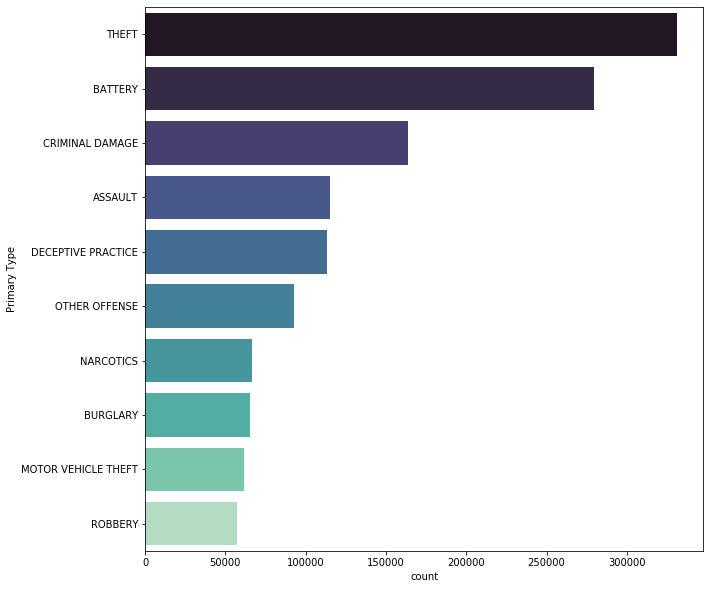

In [13]:
#plotting a bar plot for the top 10 cases
plt.figure(figsize=(10,10))
sns.countplot(y='Primary Type', data=crimes, order = order_data, palette="mako")

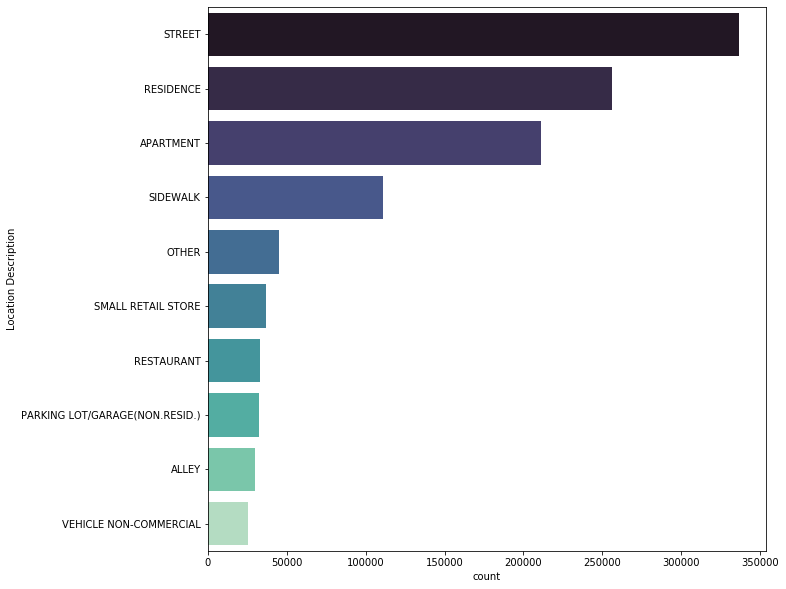

In [14]:
#Locations where the crimes happened
plt.figure(figsize = (10, 10))
sns.countplot(y= 'Location Description', data = crimes, order = crimes['Location Description'].value_counts().iloc[:10].index, palette="mako")

In [15]:
#count the no of crimes occuring in a particular year
crimes.resample('Y').size()
#resample is a convenience method for frequency conversion and resampling of time series. 

Date
2016-12-31    269553
2017-12-31    268779
2018-12-31    268355
2019-12-31    260630
2020-12-31    361620
2021-12-31     48786
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

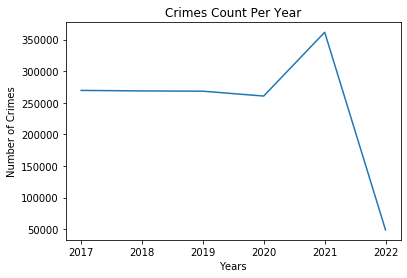

In [16]:
#plotting crimmes occuring each year vs no. of crimes happening in that year
plt.plot(crimes.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [17]:
crimes.resample('M').size()         #over the period of 'M' Months

Date
2016-01-31    20723
2016-02-29    18738
2016-03-31    22044
2016-04-30    21158
2016-05-31    23535
              ...  
2020-12-31    32544
2021-01-31    15822
2021-02-28    12534
2021-03-31    15150
2021-04-30     5280
Freq: M, Length: 64, dtype: int64

Text(0, 0.5, 'Number of Crimes')

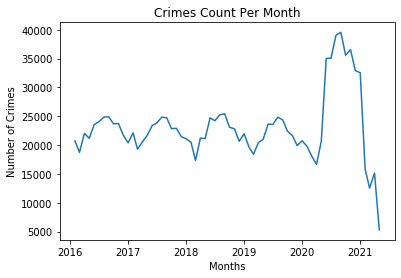

In [18]:
plt.plot(crimes.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [19]:
crimes.resample('Q').size()           #over the period of 'Q' Quaters

Date
2016-03-31     61505
2016-06-30     68753
2016-09-30     73429
2016-12-31     65866
2017-03-31     61974
2017-06-30     68898
2017-09-30     72426
2017-12-31     65481
2018-03-31     59039
2018-06-30     70072
2018-09-30     73786
2018-12-31     65458
2019-03-31     58469
2019-06-30     68225
2019-09-30     71617
2019-12-31     62319
2020-03-31     54580
2020-06-30     90795
2020-09-30    114202
2020-12-31    102043
2021-03-31     43506
2021-06-30      5280
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

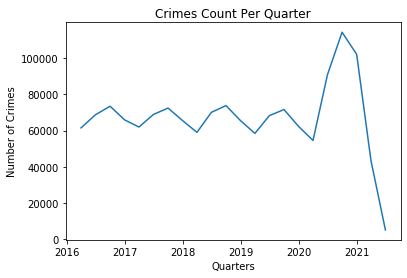

In [20]:
plt.plot(crimes.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

In [21]:
# Preparing the Data for Prophet

In [22]:
chicago_prophet = crimes.resample('M').size().reset_index()

In [23]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [24]:
chicago_prophet

,Date,Crime Count
0,2016-01-31,20723
1,2016-02-29,18738
2,2016-03-31,22044
3,2016-04-30,21158
4,2016-05-31,23535
...,...,...
59,2020-12-31,32544
60,2021-01-31,15822
61,2021-02-28,12534
62,2021-03-31,15150


In [25]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [26]:
chicago_prophet

,Date,Crime Count
0,2016-01-31,20723
1,2016-02-29,18738
2,2016-03-31,22044
3,2016-04-30,21158
4,2016-05-31,23535
...,...,...
59,2020-12-31,32544
60,2021-01-31,15822
61,2021-02-28,12534
62,2021-03-31,15150


In [27]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [28]:
chicago_prophet_df

,Date,Crime Count
0,2016-01-31,20723
1,2016-02-29,18738
2,2016-03-31,22044
3,2016-04-30,21158
4,2016-05-31,23535
...,...,...
59,2020-12-31,32544
60,2021-01-31,15822
61,2021-02-28,12534
62,2021-03-31,15150


In [29]:
# Making Future Predictions using Prophet

In [30]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [31]:
#renaming the columns into 'ds' and 'y' format for facebook prophet,
#formatting in 'M' for implementation
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [32]:
chicago_prophet_df_final

,ds,y
0,2016-01-31,20723
1,2016-02-29,18738
2,2016-03-31,22044
3,2016-04-30,21158
4,2016-05-31,23535
...,...,...
59,2020-12-31,32544
60,2021-01-31,15822
61,2021-02-28,12534
62,2021-03-31,15150


In [33]:
#instantiating prophet object
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [34]:
#forcasting into the future
totalfuture = m.make_future_dataframe(periods=720)  #periods = no. of days for prediction
totalforecast = m.predict(totalfuture)

In [35]:
totalforecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-31,21831.928110,14074.140279,24934.541895,21831.928110,21831.928110,-2424.964776,-2424.964776,-2424.964776,-2424.964776,-2424.964776,-2424.964776,0.0,0.0,0.0,19406.963333
1,2016-02-29,21886.113502,10385.165163,21882.112739,21886.113502,21886.113502,-5872.987228,-5872.987228,-5872.987228,-5872.987228,-5872.987228,-5872.987228,0.0,0.0,0.0,16013.126274
2,2016-03-31,21944.035818,11948.234194,22682.907930,21944.035818,21944.035818,-4635.279936,-4635.279936,-4635.279936,-4635.279936,-4635.279936,-4635.279936,0.0,0.0,0.0,17308.755882
3,2016-04-30,22000.089669,10441.243470,21765.911445,22000.089669,22000.089669,-5869.473040,-5869.473040,-5869.473040,-5869.473040,-5869.473040,-5869.473040,0.0,0.0,0.0,16130.616629
4,2016-05-31,22058.011981,20086.961932,31764.153710,22058.011981,22058.011981,3774.722933,3774.722933,3774.722933,3774.722933,3774.722933,3774.722933,0.0,0.0,0.0,25832.734915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2023-04-16,26749.796758,17084.386517,28451.280945,26749.792152,26749.801801,-3890.618229,-3890.618229,-3890.618229,-3890.618229,-3890.618229,-3890.618229,0.0,0.0,0.0,22859.178529
780,2023-04-17,26751.665269,18081.325431,29375.987625,26751.660657,26751.670325,-2749.290770,-2749.290770,-2749.290770,-2749.290770,-2749.290770,-2749.290770,0.0,0.0,0.0,24002.374499
781,2023-04-18,26753.533780,19407.715497,30590.431302,26753.529162,26753.538849,-1627.141671,-1627.141671,-1627.141671,-1627.141671,-1627.141671,-1627.141671,0.0,0.0,0.0,25126.392109
782,2023-04-19,26755.402291,20620.359990,31777.125033,26755.397667,26755.407372,-569.603093,-569.603093,-569.603093,-569.603093,-569.603093,-569.603093,0.0,0.0,0.0,26185.799198


C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


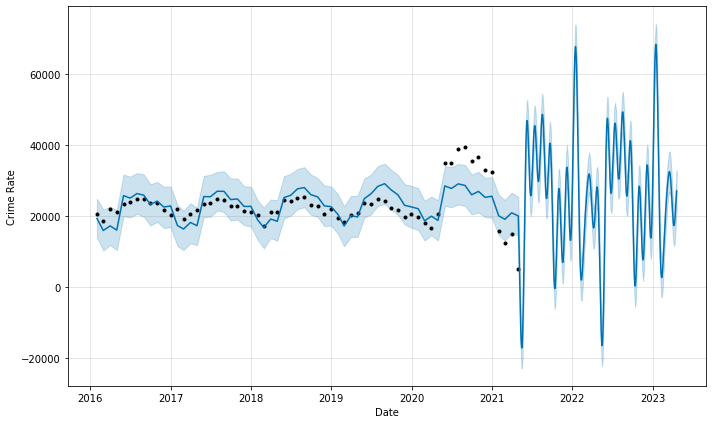

In [36]:
#visualizing future results
figure = m.plot(totalforecast, xlabel='Date', ylabel='Crime Rate')

C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


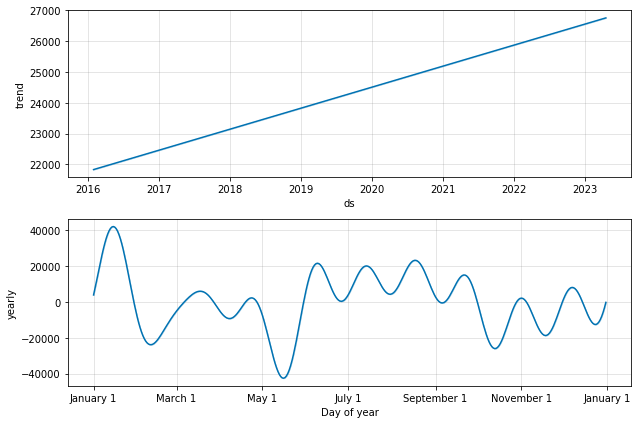

In [37]:
#expected trend in the future
figure3 = m.plot_components(totalforecast)

In [38]:
#Predicting Future crime by Non-violent

In [39]:
# Split crime types into non-violent and violent
nonviolent = ['NARCOTICS', 
              'DECEPTIVE PRACTICE', 
              'OFFENSE INVOLVING CHILDREN',
              'CRIMINAL DAMAGE', 
              'OTHER OFFENSE',
              'CRIMINAL TRESPASS',
              'INTIMIDATION',
              'OBSCENITY',
              'STALKING', 
              'PUBLIC PEACE VIOLATION',
              'INTERFERENCE WITH PUBLIC OFFICER', 
              'PUBLIC INDECENCY', 
              'PROSTITUTION', 
              'GAMBLING', 
              'OTHER NARCOTIC VIOLATION',
              'NON-CRIMINAL']

violent = ['CRIMINAL SEXUAL ASSAULT', 
           'THEFT', 
           'BURGLARY',
           'WEAPONS VIOLATION', 
           'ASSAULT',
           'ROBBERY', 
           'SEX OFFENSE', 
           'BATTERY', 
           'HOMICIDE',
           'MOTOR VEHICLE THEFT',
           'KIDNAPPING',
           'HUMAN TRAFFICKING',
           'CRIM SEXUAL ASSAULT',
           'CONCEALED CARRY LICENSE VIOLATION',
           'LIQUOR LAW VIOLATION',
           'ARSON']

In [40]:
nv_crimes  = crimes[crimes['Primary Type'].isin(nonviolent)]
v_crimes  = crimes[crimes['Primary Type'].isin(violent)]

In [41]:
# # setting the index to be the date-time column 
# nv_crimes.index = pd.DatetimeIndex(crimes.Date)


In [42]:
#counting all the no of elements within a specific column 'Primary Type'
nv_crimes['Primary Type'].value_counts()

CRIMINAL DAMAGE                     163876
DECEPTIVE PRACTICE                  113113
OTHER OFFENSE                        92921
NARCOTICS                            66559
CRIMINAL TRESPASS                    34434
OFFENSE INVOLVING CHILDREN           12999
PUBLIC PEACE VIOLATION                8371
INTERFERENCE WITH PUBLIC OFFICER      5948
PROSTITUTION                          3416
STALKING                              1217
INTIMIDATION                           935
GAMBLING                               768
OBSCENITY                              396
NON-CRIMINAL                           129
PUBLIC INDECENCY                        62
OTHER NARCOTIC VIOLATION                32
Name: Primary Type, dtype: int64

In [43]:
nv_crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [44]:
nv_crimes.resample('Y').size()

Date
2016-12-31     93523
2017-12-31     90635
2018-12-31     91596
2019-12-31     90675
2020-12-31    121038
2021-12-31     17709
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

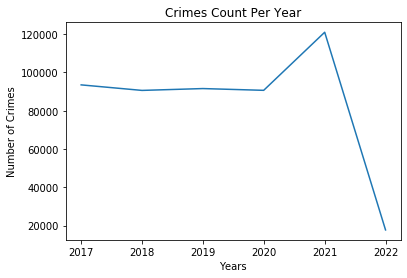

In [45]:
#plotting crimmes occuring each year vs no. of crimes happening in that year
plt.plot(nv_crimes.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


In [46]:
#performing quality set index
nv_crimes_prophet = nv_crimes.resample('M').size().reset_index()

In [47]:
nv_crimes_prophet

,Date,0
0,2016-01-31,7495
1,2016-02-29,7103
2,2016-03-31,8231
3,2016-04-30,7950
4,2016-05-31,8370
...,...,...
59,2020-12-31,12754
60,2021-01-31,6118
61,2021-02-28,4595
62,2021-03-31,5319


In [48]:
nv_crimes_prophet.columns = ['Date', 'Crime Count']

In [49]:
nv_crimes_prophet

,Date,Crime Count
0,2016-01-31,7495
1,2016-02-29,7103
2,2016-03-31,8231
3,2016-04-30,7950
4,2016-05-31,8370
...,...,...
59,2020-12-31,12754
60,2021-01-31,6118
61,2021-02-28,4595
62,2021-03-31,5319


In [50]:
nv_crimes_prophet_df = pd.DataFrame(nv_crimes_prophet)

In [51]:
nv_crimes_prophet_df

,Date,Crime Count
0,2016-01-31,7495
1,2016-02-29,7103
2,2016-03-31,8231
3,2016-04-30,7950
4,2016-05-31,8370
...,...,...
59,2020-12-31,12754
60,2021-01-31,6118
61,2021-02-28,4595
62,2021-03-31,5319


In [52]:
nv_crimes_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [53]:
nv_crimes_prophet_df_final = nv_crimes_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})


In [54]:
nv_crimes_prophet_df_final

,ds,y
0,2016-01-31,7495
1,2016-02-29,7103
2,2016-03-31,8231
3,2016-04-30,7950
4,2016-05-31,8370
...,...,...
59,2020-12-31,12754
60,2021-01-31,6118
61,2021-02-28,4595
62,2021-03-31,5319


In [55]:
nv = Prophet()
nv.fit(nv_crimes_prophet_df_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [56]:
nvfuture = nv.make_future_dataframe(periods=720)  #periods = no. of days for prediction
nvforecast = nv.predict(nvfuture)

In [57]:
nvforecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-31,7514.849342,5172.961417,9225.892054,7514.849342,7514.849342,-335.223227,-335.223227,-335.223227,-335.223227,-335.223227,-335.223227,0.0,0.0,0.0,7179.626115
1,2016-02-29,7530.083142,3993.330764,7822.306935,7530.083142,7530.083142,-1633.105778,-1633.105778,-1633.105778,-1633.105778,-1633.105778,-1633.105778,0.0,0.0,0.0,5896.977364
2,2016-03-31,7546.367548,4453.197326,8330.972463,7546.367548,7546.367548,-1217.178406,-1217.178406,-1217.178406,-1217.178406,-1217.178406,-1217.178406,0.0,0.0,0.0,6329.189142
3,2016-04-30,7562.126652,3882.484326,7760.907888,7562.126652,7562.126652,-1732.605334,-1732.605334,-1732.605334,-1732.605334,-1732.605334,-1732.605334,0.0,0.0,0.0,5829.521317
4,2016-05-31,7578.411058,7117.367138,10970.196587,7578.411058,7578.411058,1439.991563,1439.991563,1439.991563,1439.991563,1439.991563,1439.991563,0.0,0.0,0.0,9018.402621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2023-04-16,8897.538727,3448.605061,7412.411155,8897.533875,8897.543333,-3429.566477,-3429.566477,-3429.566477,-3429.566477,-3429.566477,-3429.566477,0.0,0.0,0.0,5467.972249
780,2023-04-17,8898.064083,4181.404291,8027.653580,8898.059220,8898.068701,-2808.197885,-2808.197885,-2808.197885,-2808.197885,-2808.197885,-2808.197885,0.0,0.0,0.0,6089.866198
781,2023-04-18,8898.589439,4812.862973,8637.973016,8898.584566,8898.594065,-2162.312687,-2162.312687,-2162.312687,-2162.312687,-2162.312687,-2162.312687,0.0,0.0,0.0,6736.276752
782,2023-04-19,8899.114796,5499.681971,9292.882764,8899.109912,8899.119429,-1517.015401,-1517.015401,-1517.015401,-1517.015401,-1517.015401,-1517.015401,0.0,0.0,0.0,7382.099395


C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


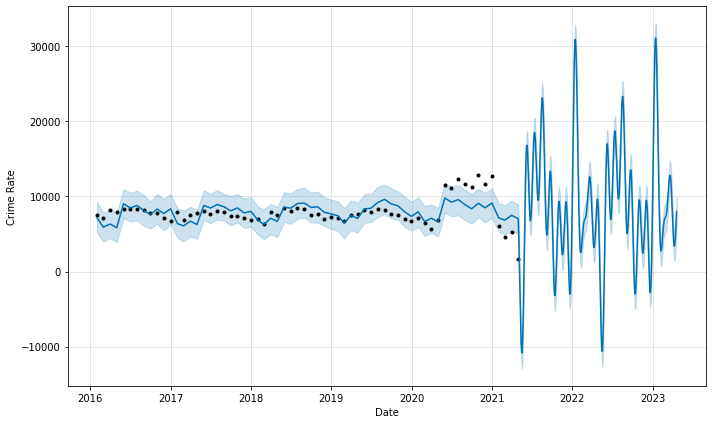

In [58]:
figure = nv.plot(nvforecast, xlabel='Date', ylabel='Crime Rate')

C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


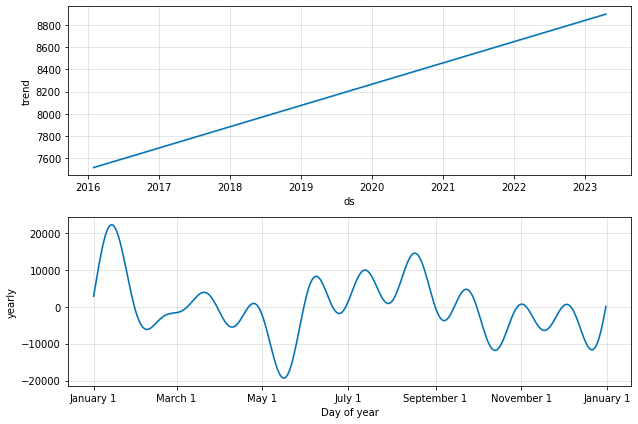

In [59]:
#expected trend in the future
figure3 = nv.plot_components(nvforecast)

In [60]:
#Predicting Future crime by Violent

In [61]:
#counting all the no of elements within a specific column 'Primary Type'
v_crimes['Primary Type'].value_counts()

THEFT                                330905
BATTERY                              279527
ASSAULT                              115349
BURGLARY                              65344
MOTOR VEHICLE THEFT                   61776
ROBBERY                               57057
WEAPONS VIOLATION                     37402
SEX OFFENSE                            6311
CRIM SEXUAL ASSAULT                    5515
HOMICIDE                               4154
CRIMINAL SEXUAL ASSAULT                3296
ARSON                                  2915
LIQUOR LAW VIOLATION                   1189
KIDNAPPING                              964
CONCEALED CARRY LICENSE VIOLATION       773
HUMAN TRAFFICKING                        57
Name: Primary Type, dtype: int64

In [62]:
v_crimes.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [63]:
v_crimes.resample('Y').size()

Date
2016-12-31    176024
2017-12-31    178142
2018-12-31    176756
2019-12-31    169955
2020-12-31    240580
2021-12-31     31077
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

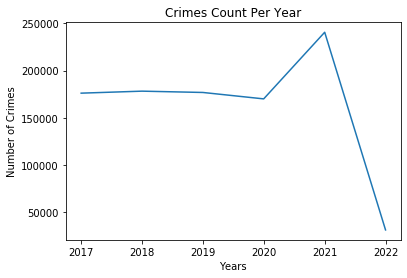

In [64]:
#plotting crimmes occuring each year vs no. of crimes happening in that year
plt.plot(v_crimes.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')


In [65]:
#performing quality set index
v_crimes_prophet = nv_crimes.resample('M').size().reset_index()

In [66]:
v_crimes_prophet

,Date,0
0,2016-01-31,7495
1,2016-02-29,7103
2,2016-03-31,8231
3,2016-04-30,7950
4,2016-05-31,8370
...,...,...
59,2020-12-31,12754
60,2021-01-31,6118
61,2021-02-28,4595
62,2021-03-31,5319


In [67]:
v_crimes_prophet.columns = ['Date', 'Crime Count']

In [68]:
v_crimes_prophet

,Date,Crime Count
0,2016-01-31,7495
1,2016-02-29,7103
2,2016-03-31,8231
3,2016-04-30,7950
4,2016-05-31,8370
...,...,...
59,2020-12-31,12754
60,2021-01-31,6118
61,2021-02-28,4595
62,2021-03-31,5319


In [69]:
v_crimes_prophet_df = pd.DataFrame(v_crimes_prophet)

In [70]:
v_crimes_prophet_df

,Date,Crime Count
0,2016-01-31,7495
1,2016-02-29,7103
2,2016-03-31,8231
3,2016-04-30,7950
4,2016-05-31,8370
...,...,...
59,2020-12-31,12754
60,2021-01-31,6118
61,2021-02-28,4595
62,2021-03-31,5319


In [71]:
v_crimes_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [72]:
v_crimes_prophet_df_final = v_crimes_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [73]:
v_crimes_prophet_df_final

,ds,y
0,2016-01-31,7495
1,2016-02-29,7103
2,2016-03-31,8231
3,2016-04-30,7950
4,2016-05-31,8370
...,...,...
59,2020-12-31,12754
60,2021-01-31,6118
61,2021-02-28,4595
62,2021-03-31,5319


In [74]:
v = Prophet()
v.fit(v_crimes_prophet_df_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [75]:
vfuture = v.make_future_dataframe(periods=720)  #periods = no. of days for prediction
vforecast = v.predict(vfuture)

In [76]:
vforecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-31,7514.849342,5272.681834,9056.933268,7514.849342,7514.849342,-335.223227,-335.223227,-335.223227,-335.223227,-335.223227,-335.223227,0.0,0.0,0.0,7179.626115
1,2016-02-29,7530.083142,4139.537626,7906.378311,7530.083142,7530.083142,-1633.105778,-1633.105778,-1633.105778,-1633.105778,-1633.105778,-1633.105778,0.0,0.0,0.0,5896.977364
2,2016-03-31,7546.367548,4382.614987,8167.963622,7546.367548,7546.367548,-1217.178406,-1217.178406,-1217.178406,-1217.178406,-1217.178406,-1217.178406,0.0,0.0,0.0,6329.189142
3,2016-04-30,7562.126652,3705.676476,7774.888637,7562.126652,7562.126652,-1732.605334,-1732.605334,-1732.605334,-1732.605334,-1732.605334,-1732.605334,0.0,0.0,0.0,5829.521317
4,2016-05-31,7578.411058,7105.797342,11053.524577,7578.411058,7578.411058,1439.991563,1439.991563,1439.991563,1439.991563,1439.991563,1439.991563,0.0,0.0,0.0,9018.402621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,2023-04-16,8897.538727,3305.018490,7206.545800,8897.534235,8897.543508,-3429.566477,-3429.566477,-3429.566477,-3429.566477,-3429.566477,-3429.566477,0.0,0.0,0.0,5467.972249
780,2023-04-17,8898.064083,3995.076677,7894.125584,8898.059583,8898.068869,-2808.197885,-2808.197885,-2808.197885,-2808.197885,-2808.197885,-2808.197885,0.0,0.0,0.0,6089.866198
781,2023-04-18,8898.589439,4631.860857,8641.727244,8898.584927,8898.594231,-2162.312687,-2162.312687,-2162.312687,-2162.312687,-2162.312687,-2162.312687,0.0,0.0,0.0,6736.276752
782,2023-04-19,8899.114796,5369.460421,9414.473594,8899.110271,8899.119596,-1517.015401,-1517.015401,-1517.015401,-1517.015401,-1517.015401,-1517.015401,0.0,0.0,0.0,7382.099395


C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


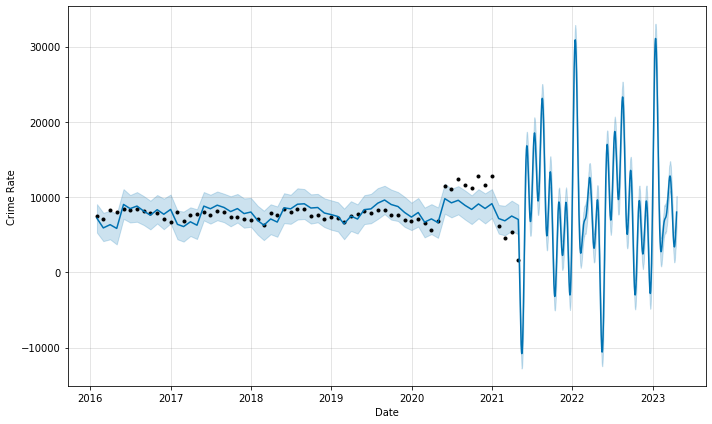

In [77]:
figure = v.plot(vforecast, xlabel='Date', ylabel='Crime Rate')

C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\zinkk\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


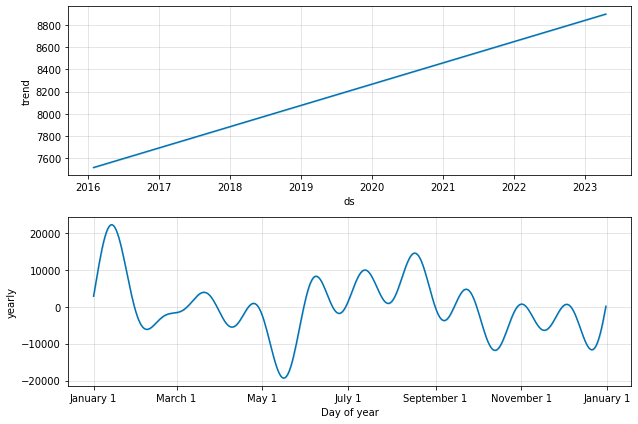

In [78]:
#expected trend in the future
figure3 = v.plot_components(vforecast)

## Choropleth Maps


In [79]:
# # Districts = pd.read_csv('C:\\Users\\zinkk\\Documents\\MSDS Classes\\498\\Chicago_Crime_Data_04192021\\districts.geojson')

# # Districts.head()

# # pandas.read_json(path_or_buf=None, orient=None, typ='frame', dtype=True, convert_axes=True, convert_dates=True, 
# #                  keep_default_dates=True, 
# #                  numpy=False, precise_float=False, date_unit=None, 
# #                  encoding=None, lines=False, chunksize=None, compression='infer')

# import geopandas as gpd
# districts_geojson = gpd.read_file('C:\\Users\\zinkk\\Documents\\MSDS Classes\\498\\Chicago_Crime_Data_04192021\\districts.geojson')

In [80]:
# boundaries_geojson = gpd.read_file('C:\\Users\\zinkk\\Documents\\MSDS Classes\\498\\Chicago_Crime_Data_04192021\\Boundaries.geojson')
# print(boundaries_geojson.head())

In [81]:
#https://www.kaggle.com/uds5501/chicago-crime-mapping

In [82]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11, 
                        tiles="cartodbpositron")


In [83]:
locations = crimes.groupby('Community Area').first()

In [84]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [85]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [86]:
chicago_map

In [87]:
unique_locations = crimes['Location'].value_counts()

In [88]:
unique_locations.index

Index(['(41.883500187, -87.627876698)', '(41.976290414, -87.905227221)',
       '(41.897895128, -87.624096605)', '(41.754592961, -87.741528537)',
       '(41.868180939, -87.709271389)', '(41.868541914, -87.639235361)',
       '(41.742710224, -87.634088181)', '(41.88171846, -87.627760426)',
       '(41.979006297, -87.906463155)', '(41.976762981, -87.900983721)',
       ...
       '(41.748814844, -87.644293799)', '(41.871051551, -87.697288818)',
       '(41.711916858, -87.636897866)', '(41.746715264, -87.624414482)',
       '(41.975512639, -87.804830821)', '(41.874966243, -87.689168376)',
       '(41.779566747, -87.602868635)', '(41.853992839, -87.719914589)',
       '(41.849399638, -87.679258111)', '(41.768588987, -87.628249989)'],
      dtype='object', length=340504)

In [89]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2431
1,"(41.976290414, -87.905227221)",1428
2,"(41.897895128, -87.624096605)",1377
3,"(41.754592961, -87.741528537)",1330
4,"(41.868180939, -87.709271389)",1212


In [90]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [91]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [92]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

In [93]:
%%time

chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="cartodbpositron")

for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 45
    
    if CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(chicago_map_crime)

Wall time: 126 ms


In [94]:
chicago_map_crime

Nonviolent Crime Map

In [95]:
#nonviolent crimes choropleth map
#nv_crimes


In [96]:
nv_chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11, 
                        tiles="cartodbpositron")

In [97]:
nv_locations = nv_crimes.groupby('Community Area').first()

In [98]:
nv_new_locations = nv_locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [99]:
for i in range(len(nv_new_locations)):
    lat = nv_new_locations.iloc[i][0]
    long = nv_new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(nv_new_locations.index[i],
                               nv_new_locations.iloc[i][-1],
                               nv_new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(nv_chicago_map)

In [100]:
nv_chicago_map

In [101]:
nv_unique_locations = nv_crimes['Location'].value_counts()

In [102]:
nv_unique_locations.index

Index(['(41.868180939, -87.709271389)', '(41.976290414, -87.905227221)',
       '(42.022062685, -87.67484904)', '(41.891694878, -87.626155832)',
       '(41.953900467, -87.907472601)', '(41.883500187, -87.627876698)',
       '(41.897895128, -87.624096605)', '(41.692833841, -87.60431945)',
       '(41.976762981, -87.900983721)', '(41.830611847, -87.623247369)',
       ...
       '(41.890077178, -87.711272927)', '(42.008837491, -87.684798646)',
       '(41.900484579, -87.698462441)', '(42.005409107, -87.697390885)',
       '(41.774073963, -87.725083266)', '(41.789104677, -87.723052748)',
       '(41.786634206, -87.617400397)', '(41.774754809, -87.685959783)',
       '(41.721635295, -87.630269043)', '(41.88492121, -87.650956564)'],
      dtype='object', length=194063)

In [103]:
nv_CR_index = pd.DataFrame({"Raw_String" : nv_unique_locations.index, "ValueCount":nv_unique_locations})
nv_CR_index.index = range(len(nv_unique_locations))
nv_CR_index.head()

,Raw_String,ValueCount
0,"(41.868180939, -87.709271389)",1196
1,"(41.976290414, -87.905227221)",510
2,"(42.022062685, -87.67484904)",434
3,"(41.891694878, -87.626155832)",402
4,"(41.953900467, -87.907472601)",391


In [104]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [105]:
nv_CR_index['LocationCoord'] = nv_CR_index['Raw_String'].apply(Location_extractor)

In [106]:
nv_CR_index  = nv_CR_index.drop(columns=['Raw_String'], axis = 1)

In [107]:
%%time

nv_chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="cartodbpositron")

for i in range(500):
    lat = nv_CR_index['LocationCoord'].iloc[i][0]
    long = nv_CR_index['LocationCoord'].iloc[i][1]
    radius = nv_CR_index['ValueCount'].iloc[i] / 45
    
    if nv_CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               nv_CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(nv_chicago_map_crime)

Wall time: 184 ms


In [108]:
nv_chicago_map_crime

In [109]:
#violent crimes choropleth map
#v_crimes

In [133]:
v_crimes.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-04-06 20:00:00,11284146.0,JB222190,4/6/2018 20:00,051XX S WHIPPLE ST,265,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER,RESIDENCE,False,False,...,14.0,63.0,2,1156915.0,1870359.0,2018.0,4/16/2021 17:19,41.800034,-87.700078,"(41.800034324, -87.700078408)"
2018-11-17 10:31:00,11509891.0,JB519275,11/17/2018 10:31,050XX W QUINCY ST,325,ROBBERY,VEHICULAR HIJACKING,STREET,True,False,...,28.0,25.0,3,1142867.0,1898533.0,2018.0,4/16/2021 17:19,41.877620,-87.750897,"(41.877620274, -87.750896624)"
2018-06-14 14:00:00,12341117.0,JE197654,6/14/2018 14:00,097XX S UNION AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,VEHICLE - COMMERCIAL,False,False,...,34.0,73.0,2,NaN,NaN,2018.0,4/16/2021 17:26,NaN,NaN,NaN
2018-03-06 17:35:00,11248802.0,JB176088,3/6/2018 17:35,131XX S LANGLEY AVE,530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,CHA APARTMENT,False,True,...,9.0,54.0,04A,1183247.0,1818217.0,2018.0,4/17/2021 17:23,41.656378,-87.605130,"(41.656377699, -87.605129591)"
2018-09-20 15:37:00,11452458.0,JB443662,9/20/2018 15:37,040XX N KENMORE AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,46.0,3.0,04A,1168447.0,1926946.0,2018.0,4/17/2021 17:23,41.955072,-87.656150,"(41.955072407, -87.656149793)"


In [134]:
v_chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11, 
                        tiles="cartodbpositron")

In [135]:
v_locations = v_crimes.groupby('Community Area').first()

In [136]:
v_new_locations = v_locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [137]:
for i in range(len(v_new_locations)):
    lat = v_new_locations.iloc[i][0]
    long = v_new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(v_new_locations.index[i],
                               v_new_locations.iloc[i][-1],
                               v_new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(v_chicago_map)

In [138]:
v_chicago_map

In [139]:
v_unique_locations = v_crimes['Location'].value_counts()

In [140]:
v_unique_locations.index

Index(['(41.883500187, -87.627876698)', '(41.754592961, -87.741528537)',
       '(41.897895128, -87.624096605)', '(41.868541914, -87.639235361)',
       '(41.976290414, -87.905227221)', '(41.742710224, -87.634088181)',
       '(41.882394062, -87.627844798)', '(41.909664252, -87.742728815)',
       '(41.979006297, -87.906463155)', '(41.695982095, -87.596653142)',
       ...
       '(41.701140268, -87.706055438)', '(41.935710439, -87.703115253)',
       '(41.724713873, -87.614216202)', '(41.915755678, -87.688023532)',
       '(41.90709641, -87.72035796)', '(41.756965722, -87.67332553)',
       '(41.92325974, -87.703087137)', '(41.940860188, -87.793358871)',
       '(41.834704074, -87.716965056)', '(41.768588987, -87.628249989)'],
      dtype='object', length=268063)

In [141]:
v_CR_index = pd.DataFrame({"Raw_String" : v_unique_locations.index, "ValueCount":v_unique_locations})
v_CR_index.index = range(len(v_unique_locations))
v_CR_index.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2043
1,"(41.754592961, -87.741528537)",1183
2,"(41.897895128, -87.624096605)",1005
3,"(41.868541914, -87.639235361)",968
4,"(41.976290414, -87.905227221)",918


In [142]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [143]:
v_CR_index['LocationCoord'] = v_CR_index['Raw_String'].apply(Location_extractor)

In [144]:
v_CR_index  = v_CR_index.drop(columns=['Raw_String'], axis = 1)

In [145]:
%%time

v_chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=13,
                        tiles="cartodbpositron")

for i in range(500):
    lat = v_CR_index['LocationCoord'].iloc[i][0]
    long = v_CR_index['LocationCoord'].iloc[i][1]
    radius = v_CR_index['ValueCount'].iloc[i] / 45
    
    if v_CR_index['ValueCount'].iloc[i] > 1000:
        color = "#FF4500"
    else:
        color = "#008080"
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               v_CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = True).add_to(v_chicago_map_crime)

Wall time: 250 ms


In [146]:
v_chicago_map_crime